# Intro

## Load

### Standards

In [1]:
import os, sys, pickle
import numpy as np
from tqdm.notebook import trange, tqdm
import re

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1


### Homemade modules

In [3]:
from tesste import tesste
from ppp import ppp
from readers_and_converters import file2text, text2dict, text2vec

## Stoopid infos

In [4]:
L_SDGS=17

In [5]:
with open('./data/sdgs.pickle', 'rb') as f:
    sdgs=pickle.load(f)

# Energy

## Folders

In [6]:
main_folder='./chatgpt_summaries/'

In [7]:
e_folder=main_folder+'Energy/'

In [8]:
ec_folders=os.listdir(e_folder)
ec_folders.sort()

In [9]:
ec_folders

['01_shell',
 '02_BP',
 '03_Harbour_Energy_PLC',
 '04_energeans',
 '05_ITHACA_ENERGY_PLC',
 '06_LSE_WG',
 '07_SERICA_ENERGY_PLC',
 '08_ASHTEAD_TECHNOLOGY_HOLDINGS_PLC',
 '10_DIVERSIFIED_ENERGY_COMPANY_PLC']

## Basics

In [10]:
energy_texts={}
for y in range(2015, 2024):
    energy_texts[str(y)]={}

In [11]:
for i, ec_folder in enumerate(tqdm(ec_folders)):
    files=os.listdir(e_folder+ec_folder)
    files.sort()
    for file in tqdm(files, desc=ec_folder, leave=False):
        year=file[:4]
        #print(year)
        energy_texts[year][ec_folder]=file2text(e_folder+ec_folder+'/'+file)
    

  0%|          | 0/9 [00:00<?, ?it/s]

01_shell:   0%|          | 0/9 [00:00<?, ?it/s]

02_BP:   0%|          | 0/9 [00:00<?, ?it/s]

03_Harbour_Energy_PLC:   0%|          | 0/2 [00:00<?, ?it/s]

04_energeans:   0%|          | 0/6 [00:00<?, ?it/s]

05_ITHACA_ENERGY_PLC:   0%|          | 0/2 [00:00<?, ?it/s]

06_LSE_WG:   0%|          | 0/5 [00:00<?, ?it/s]

07_SERICA_ENERGY_PLC:   0%|          | 0/5 [00:00<?, ?it/s]

08_ASHTEAD_TECHNOLOGY_HOLDINGS_PLC:   0%|          | 0/3 [00:00<?, ?it/s]

10_DIVERSIFIED_ENERGY_COMPANY_PLC:   0%|          | 0/5 [00:00<?, ?it/s]

# Utilities

## Folders

In [12]:
main_folder='./chatgpt_summaries/'

In [13]:
u_folder=main_folder+'Utilities/'

In [14]:
uc_folders=os.listdir(u_folder)
uc_folders.sort()

In [15]:
uc_folders

['01_NATIONAL_GRID_PLC',
 '02_SSE_PLC',
 '03_SEVERN_TRENT_PLC',
 '04_UNITED_UTILITIES_GROUP_PLC',
 '05_CENTRICA_PLC',
 '06_DRAX_GROUP_PLC',
 '07_PENNON_GROUP_PLC',
 '08_RENEWI_PLC',
 '10_GOOD_ENERGY_GROUP_PLC']

## Basics

In [16]:
utilitites_texts={}
for y in range(2015, 2024):
    utilitites_texts[str(y)]={}

In [17]:
for i, uc_folder in enumerate(tqdm(uc_folders)):
    files=os.listdir(u_folder+uc_folder)
    files.sort()
    for file in tqdm(files, desc=uc_folder, leave=False):
        year=file[:4]
        #print(year)
        utilitites_texts[year][uc_folder]=file2text(u_folder+uc_folder+'/'+file)
    

  0%|          | 0/9 [00:00<?, ?it/s]

01_NATIONAL_GRID_PLC:   0%|          | 0/4 [00:00<?, ?it/s]

02_SSE_PLC:   0%|          | 0/9 [00:00<?, ?it/s]

03_SEVERN_TRENT_PLC:   0%|          | 0/4 [00:00<?, ?it/s]

04_UNITED_UTILITIES_GROUP_PLC:   0%|          | 0/1 [00:00<?, ?it/s]

05_CENTRICA_PLC:   0%|          | 0/6 [00:00<?, ?it/s]

06_DRAX_GROUP_PLC:   0%|          | 0/1 [00:00<?, ?it/s]

07_PENNON_GROUP_PLC:   0%|          | 0/3 [00:00<?, ?it/s]

08_RENEWI_PLC:   0%|          | 0/7 [00:00<?, ?it/s]

10_GOOD_ENERGY_GROUP_PLC:   0%|          | 0/5 [00:00<?, ?it/s]

# Save me!

In [18]:
text_dict={'Energy': energy_texts, 'Utilities': utilitites_texts}
with open ('./data/energy_utilities_texts.pickle', 'wb') as f:
    pickle.dump(text_dict, f)

# Plot me!

In [19]:
with open ('./data/energy_utilities_texts.pickle', 'rb') as f:
    text_dict=pickle.load(f)

In [20]:
utilitites_texts=text_dict['Utilities']
energy_texts=text_dict['Energy']

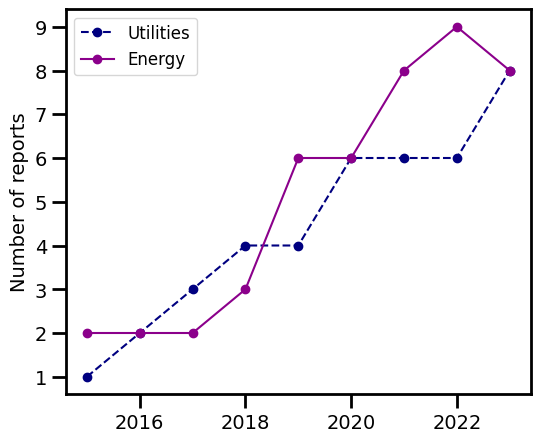

In [52]:
plt.figure(figsize=(6,5))
plt.plot(range(2015, 2024), [len(utilitites_texts[year].keys()) for year in utilitites_texts.keys()], marker='o', c='navy', label='Utilities', linestyle='--')
plt.plot(range(2015, 2024), [len(energy_texts[year].keys()) for year in energy_texts.keys()], marker='o', c='darkmagenta', label='Energy', linestyle='-')
plt.ylabel('Number of reports', fontsize=14)
plt.legend(fontsize=12)
plt.savefig('./plots/chatgpt_n_reports.png', dpi=300, bbox_inches='tight')
plt.show()

# SDGs

In [22]:
with open ('./data/energy_utilities_texts.pickle', 'rb') as f:
    text_dict=pickle.load(f)

## Dictionaries and binary results

In [23]:
sdgs_dict={}
binary_dict={}
for year in trange(2015, 2024):
    s_year=str(year)
    sdgs_dict[year]={}
    binary_dict[year]={}
    for field in ['Energy', 'Utilities']:
        sdgs_dict[year][field]={}
        firms=list(text_dict[field][s_year].keys())
        binary_dict[year][field]=np.zeros((len(firms), L_SDGS), dtype=int)
        for i_f, firm in enumerate(firms):
            text=text_dict[field][s_year][firm]
            _dict, check=text2dict(text)
            if check==1:
                print(year, field, firm)
            sdgs_dict[year][field][firm]=_dict
            binary_dict[year][field][i_f]=text2vec(_dict)

  0%|          | 0/9 [00:00<?, ?it/s]

2017 Utilities 08_RENEWI_PLC


### Save me!

In [28]:
with open ('./data/sdgs_dict.pickle', 'wb') as f:
    pickle.dump(sdgs_dict, f)

In [29]:
with open ('./data/energy_utilities_binary.pickle', 'wb') as f:
    pickle.dump(binary_dict, f)

Recap:

In [30]:
binary_dict.keys()

dict_keys([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [31]:
sdgs_dict.keys()

dict_keys([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [32]:
sdgs_dict[2015].keys()

dict_keys(['Energy', 'Utilities'])

In [33]:
sdgs_dict[2015]['Energy'].keys()

dict_keys(['01_shell', '02_BP'])

### Plot me!

Not all SDGs are covered at least one time in each report.

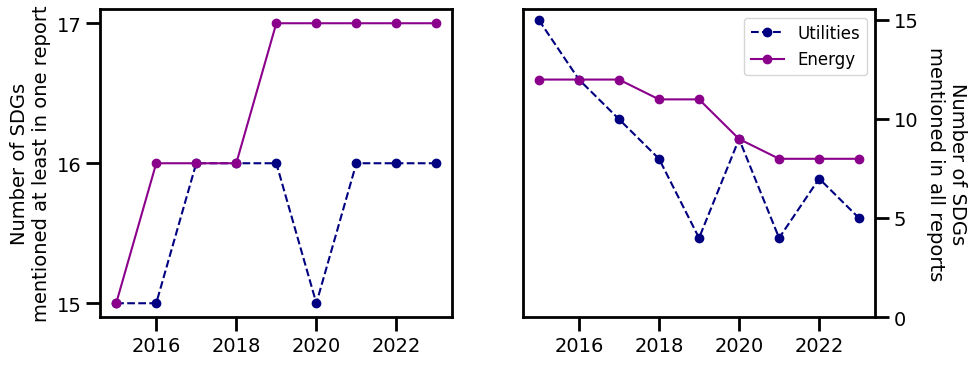

In [34]:
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
sector_colors=['navy', 'darkmagenta']
sector_ls=['--', '-']
for i_s, sector in enumerate(['Utilities', 'Energy']):
    axs[0].plot(range(2015, 2024), [np.sum(np.sum(binary_dict[key][sector], axis=0)>0) for key in range(2015, 2024)], marker='o', c=sector_colors[i_s], label=sector, linestyle=sector_ls[i_s])
    axs[1].plot(range(2015, 2024), [np.sum(np.sum(binary_dict[key][sector], axis=0)==binary_dict[key][sector].shape[0]) for key in range(2015, 2024)], marker='o', c=sector_colors[i_s], label=sector, linestyle=sector_ls[i_s])

axs[0].set_ylabel('Number of SDGs\nmentioned at least in one report', fontsize=14)
axs[0].set_yticks(np.arange(15, 18, dtype=int))

axs[1].set_ylabel('Number of SDGs\nmentioned in all reports', fontsize=14, rotation=270, labelpad=35)
axs[1].set_yticks(np.arange(0, 18, 5, dtype=int))

axs[1].yaxis.tick_right()
axs[1].yaxis.set_label_position("right")

plt.legend(fontsize=12)
plt.show()

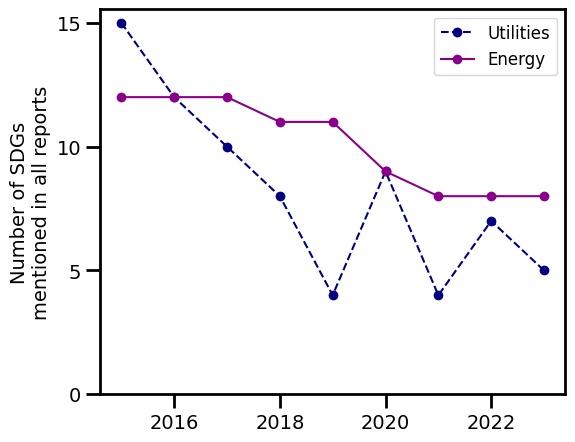

In [53]:
#fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(10,4))
plt.figure(figsize=(6,5))
sector_colors=['navy', 'darkmagenta']
sector_ls=['--', '-']
for i_s, sector in enumerate(['Utilities', 'Energy']):
    plt.plot(range(2015, 2024), [np.sum(np.sum(binary_dict[key][sector], axis=0)==binary_dict[key][sector].shape[0]) for key in range(2015, 2024)], marker='o', c=sector_colors[i_s], label=sector, linestyle=sector_ls[i_s])

plt.ylabel('Number of SDGs\nmentioned in all reports', fontsize=14)
plt.yticks(np.arange(0, 18, 5, dtype=int))
plt.legend(fontsize=12)

plt.savefig('./plots/chatgpt_n_sdgs_in_all_reports.png', dpi=300, bbox_inches='tight')
plt.show()

# Where to go next?

I fear that the statistical validation is not that relevant, due to the limited dimension of the matrices: at most we have a 8x17 matrix. May it be interesting to validate the bipartite matrix of all years altogether? Even in this case, the matrices will be quite small. For the moment let us leave those (ugly) plots here.